In [ ]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def Consolidate(filename, reps):
    data = pd.DataFrame(columns=['Potential/V', 'Current/A', 'Pass', 'Source'])
    for i in range(1,reps+1):
        read = False
        passthrough = 0
        a = ''
        critical = []
    
        with open(filename + str(i) + '.txt', 'r') as infile:
            for line in infile:
                a = line.split()
                if 'High E' in line:
                    critical.append(float(a[-1]))
                if 'Low E' in line:
                    critical.append(float(a[-1]))
                if read:
                    if float(a[0]) in critical:
                        passthrough += 1
                    data = data.append({'Potential/V':float(a[0]), 'Current/A':float(a[1]), 'Pass':passthrough, 'Source':filename + str(i) + '.txt'}, ignore_index=True)
                if col1 in line:
                    read = True
                    next(infile)
    
    data.to_csv(filename + 'Complete.csv', index = False)
    return data
    

def Graph(data, reps):
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
    for i in range(0, reps + 1):
        if i == 0:
            x_axis = data.iloc[:,0]
            y_axis = data.iloc[:,1]
            plt.title('Complete ' + 'Potential/V' + ' Vs. ' + 'Current/A')
        else:
            is_i = data['Source'] == 'AGN_61218_W3C4_E1A_' + str(i) + '.txt'
            data_i = data[is_i]
            x_axis = data_i.iloc[:,0]
            y_axis = data_i.iloc[:,1]
            plt.title('Source ' + str(i) + ' ' + 'Potential/V' + ' Vs. ' + 'Current/A')
        plt.scatter(x_axis, y_axis, color = colors[i], marker='.', label="item 1")

        plt.xlabel('Potential/V')
        plt.ylabel('Current/A')
        plt.grid(True)
        plt.show()
        
def Calculate(data):
    pd.set_option("display.precision", 12)

    lowerbound = float(input('Lower Bound: '))
    upperbound = float(input('Upper Bound: '))

    in_range = data['Potential/V'].between(lowerbound, upperbound, inclusive = True) 
    data_in_range = data[in_range]
    AvgCurrent = data_in_range.groupby('Pass').mean()['Current/A']
    return AvgCurrent

File Prefix:  AGN_61218_W3C4_E1A_
Replications:  3


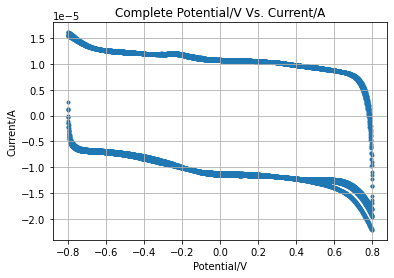

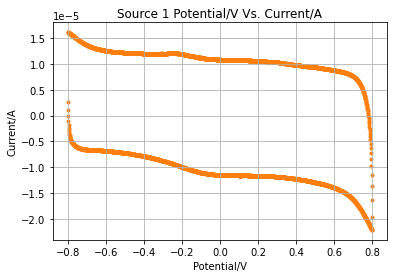

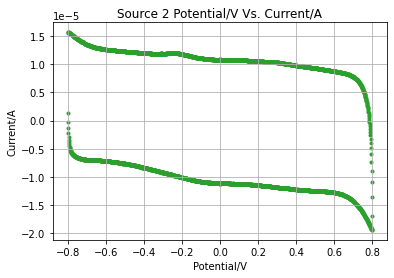

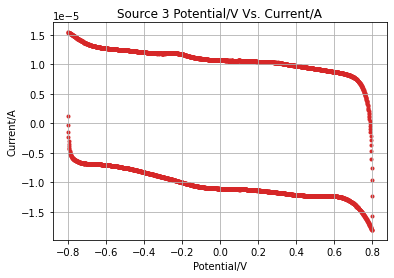

Lower Bound:  0
Upper Bound:  .2


Pass
1   -0.000011337794
2    0.000010646318
Name: Current/A, dtype: float64

In [125]:
filename =  input("File Prefix: ") #'AGN_61218_W3C4_E1A_'
reps = int(input('Replications: ')) #3
dat = Consolidate(filename,reps)
Graph(dat,reps)
Calculate(dat)